### Plot MISR L1B1 Radiance images from a single camera hdf file

In [1]:
import xarray as xr
import rioxarray
import h5py
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
misr_l1b_rad = rioxarray.open_rasterio('MISR_AM1_RP_GM_P138_O120677_CA_F03_0024.hdf')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


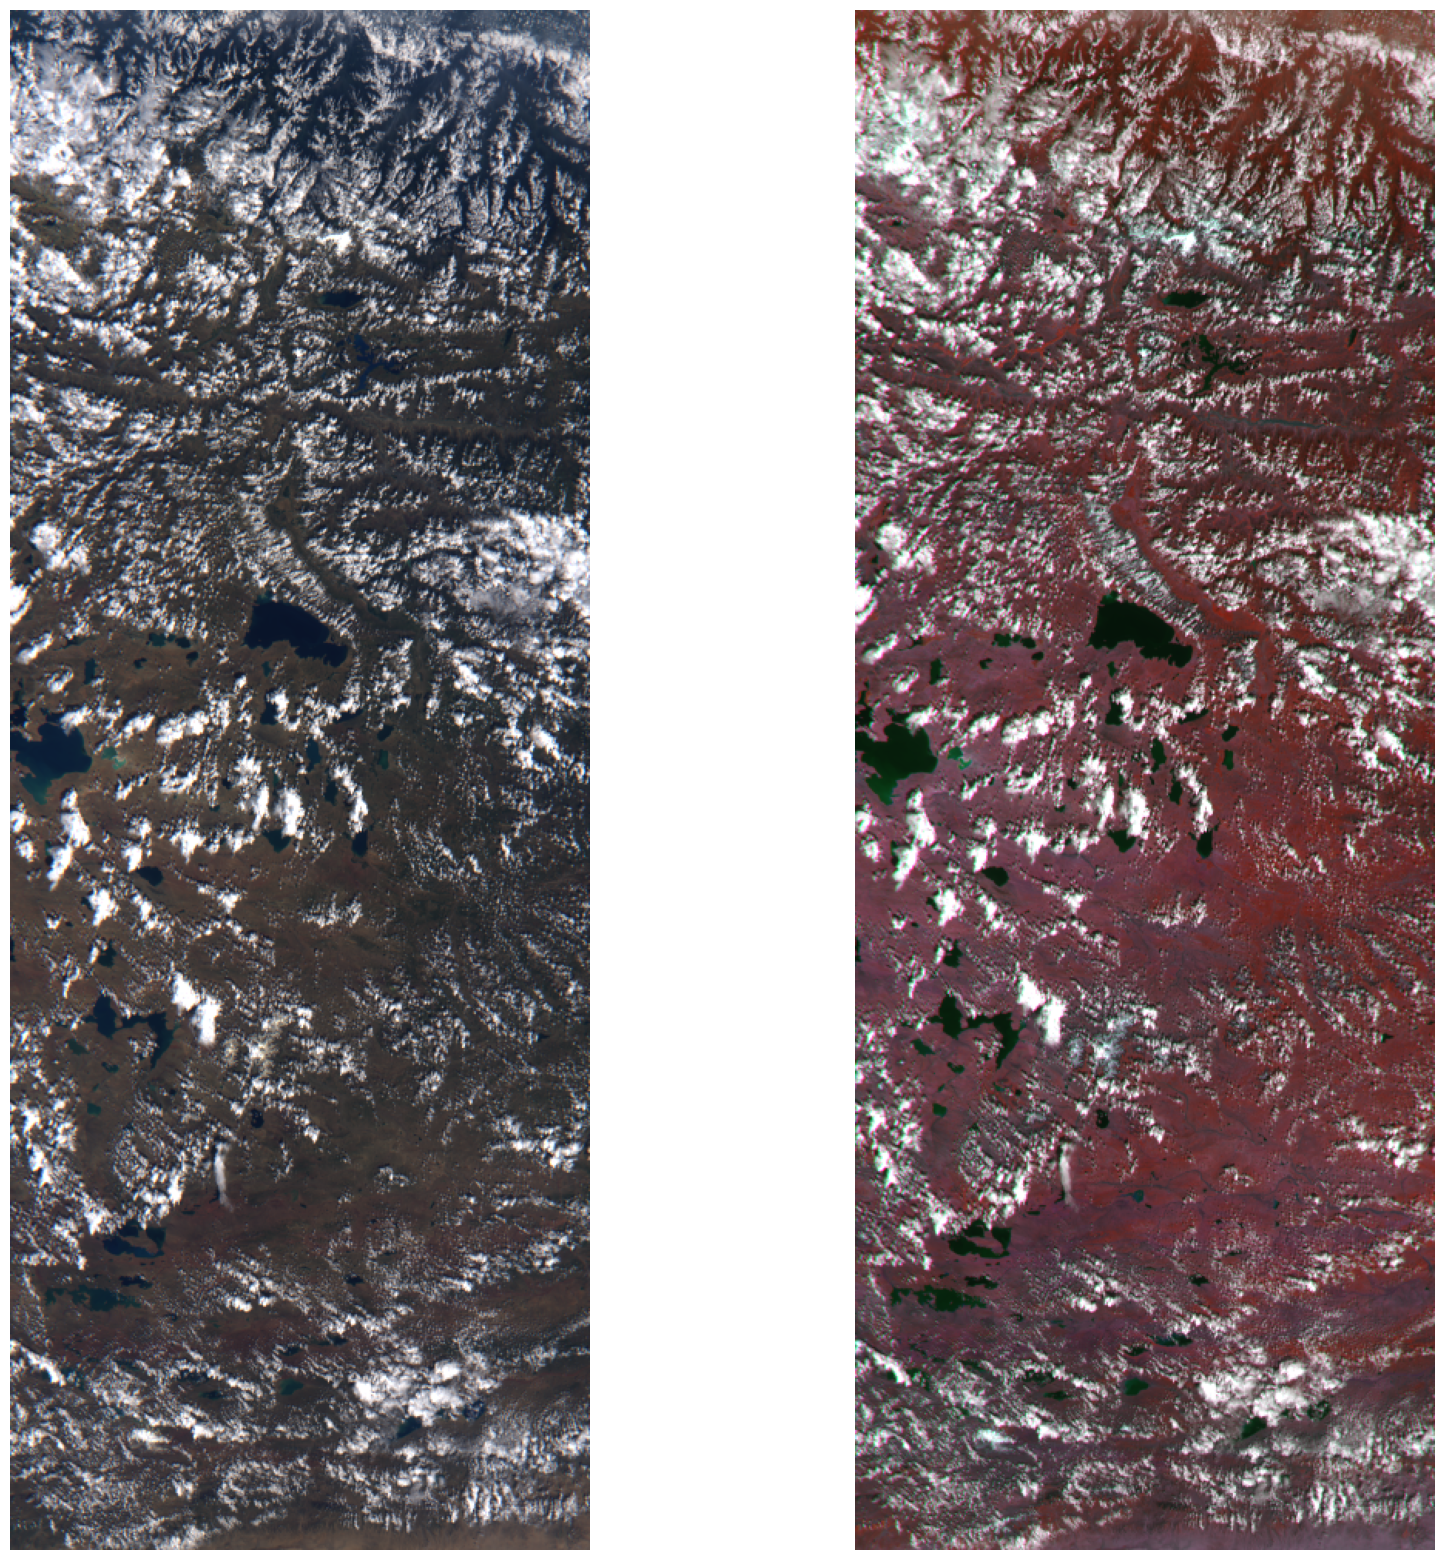

In [3]:
# choose y index to start slice at
y=7000


# Red is at 250 m resolution, resample up to 1 km
R_original_resolution = misr_l1b_rad[1].L1B1_Scaled_Rad_Red.squeeze()
R_reduced_resolution = (R_original_resolution
                        .groupby(((R_original_resolution.x//4) + 0.5) * 4)
                        .mean(dim='x')
                        .groupby(((R_original_resolution.y//4) + 0.5) * 4)
                        .mean(dim='y'))

# get slice from each band, offset pixels to account for band position differences
R = R_reduced_resolution.isel(y=slice(y+4,y+1004)).squeeze()
G = misr_l1b_rad[0].L1B1_Scaled_Rad_Green.isel(y=slice(y,y+1000)).squeeze()
B = misr_l1b_rad[0].L1B1_Scaled_Rad_Blue.isel(y=slice(y-4,y+996)).squeeze()
NIR = misr_l1b_rad[0].L1B1_Scaled_Rad_Nir.isel(y=slice(y+8,y+1008)).squeeze()


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20,20))

# create R,G,B array and plot image
brighten_factor = 1.5
ax1.imshow(brighten_factor*np.array([R.T/R.max(), G.T/G.max(), B.T/B.max()]).T, origin='lower')
ax1.set_aspect(1)
ax1.axis('off');


# create NIR,G,R array and plot image
brighten_factor = 1.5 # to make a pretty picture
ax2.imshow(brighten_factor*np.array([NIR.T/NIR.max(), G.T/G.max(), R.T/R.max()]).T, origin='lower')
ax2.set_aspect(1)
ax2.axis('off');